In [8]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [9]:
import os
import pandas as pd
import random
path = "/content/drive/MyDrive/Colab Notebooks/Final Project"

In [10]:
train_df=pd.read_csv(path+'/train_dataset.csv',usecols=[0,1])
test_df=pd.read_csv(path+'/test_dataset.csv',usecols=[0,1])

In [11]:
from  sklearn.model_selection  import  train_test_split
train_df,  validation_df=train_test_split(train_df,train_size=0.8)
print(train_df.shape,validation_df.shape,test_df.shape)


(12134, 2) (3034, 2) (1686, 2)


In [12]:
train_df['path'].iloc[1]

'/content/drive/MyDrive/Colab Notebooks/Final Project/train/Potato Red/Potato Red_332.jpg'

In [13]:
from PIL import Image
Image.open("/content/drive/MyDrive/Colab Notebooks/Final Project/train/Cactus fruit/Cactus fruit_169.jpg").mode

'RGB'

In [14]:
from  tensorflow.keras.preprocessing.image  import  ImageDataGenerator
import  numpy  as  np
#  Instantiate  ImageDataGenerator  class
train_datagen  =  ImageDataGenerator(rescale=1./255)
#  Configure  train  data  generator
train_gen=train_datagen.flow_from_dataframe(
        train_df,
        x_col="path",
        y_col="category",
        target_size=(100, 100),
        color_mode="rgb",
        class_mode="categorical",
        batch_size=32,
        shuffle=True)

#  Configure  validation  data  generator
val_datagen  =  ImageDataGenerator(rescale=1./255)
val_gen=val_datagen.flow_from_dataframe(
        validation_df,
        x_col="path",
        y_col="category",
        target_size=(100,  100),
        color_mode="rgb",
        class_mode="categorical",
        )

#  Configure  test  data  generator
test_datagen  =  ImageDataGenerator(rescale=1./255)
test_gen=test_datagen.flow_from_dataframe(
        test_df,
        x_col="path",
        y_col="category",
        target_size=(100,  100),
        color_mode="rgb",
        class_mode="categorical",
        )

Found 12134 validated image filenames belonging to 33 classes.
Found 3034 validated image filenames belonging to 33 classes.
Found 1686 validated image filenames belonging to 33 classes.


### Larger Convolution Model

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, Callback

# Build sequential model
model=Sequential()
model.add(Conv2D(33, (3,3),input_shape=(100,100,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(66, (3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(99, (3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(66, (3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())                                                      
                  # Add Dropout layer, randomly drops 20% neurons from propagation.
model.add(Dense(64,activation="relu"))
model.add(Dense(33,activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 33)        924       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 33)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 66)        19668     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 66)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 99)        58905     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 99)       0

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, Callback

# Build sequential model
model=Sequential()
model.add(Conv2D(33, (3,3),input_shape=(100,100,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(66, (3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(99, (3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(66, (3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())                                                      
                  # Add Dropout layer, randomly drops 20% neurons from propagation.
model.add(Dense(64,activation="relu"))
model.add(Dense(33,activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['acc'])

# Configure EarlyStopping object
Es=EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)      # EarlyStopping with patience 2: if in 2 consecutive epochs, the validation loss didn't hit the record, training will stop.

# Fit the model and record the training history for plotting purpose
history=model.fit(train_gen,
      steps_per_epoch=180, #train_gen.n//train_gen.batch_size
      epochs=5,
      validation_data=val_gen,
      validation_steps=50, #val_gen.n//val_gen.batch_size
      callbacks=[Es])                                                           # Here is how we use EarlyStopping

Epoch 1/5
180/180 [==============================] - 3138s 17s/step - loss: 1.4014 - acc: 0.5912 - val_loss: 0.1658 - val_acc: 0.9544
Epoch 2/5
180/180 [==============================] - 1592s 9s/step - loss: 0.2618 - acc: 0.9236 - val_loss: 0.1391 - val_acc: 0.9544
Epoch 3/5
180/180 [==============================] - 838s 5s/step - loss: 0.1179 - acc: 0.9677 - val_loss: 1.3838 - val_acc: 0.7337
Epoch 4/5
180/180 [==============================] - 436s 2s/step - loss: 0.0936 - acc: 0.9774 - val_loss: 0.0071 - val_acc: 0.9981
Epoch 5/5
180/180 [==============================] - 243s 1s/step - loss: 0.0620 - acc: 0.9847 - val_loss: 0.0034 - val_acc: 0.9994


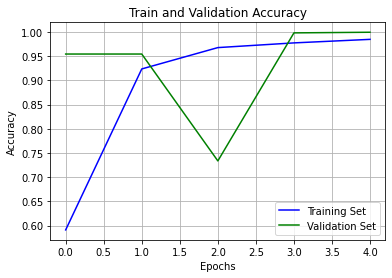

In [18]:
# Plot history
import matplotlib.pyplot as plt
plt.plot([0.5912,0.9236,0.9677,0.9774,0.9847], color='b',label='Training Set')
plt.plot([0.9544,0.9544,0.7337,0.9981,0.9994], color='g',label='Validation Set')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Validation Accuracy")
plt.legend()
plt.grid()
plt.show()